# Training models (Chapter 4)

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Linear regression

#### Synthetic linear data

In [6]:
X = 2 * np.random.rand(100, 1)     # x is uniform random values in [0, 2]
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + norm distr noise

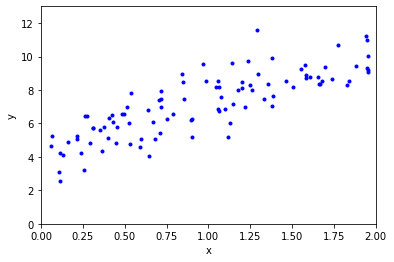

In [12]:
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 4+3*2+3])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Closed-form solution: The normal equation

theta_hat = (X^T.X)^(-1).X^T.y

In [19]:
X_b = np.c_[np.ones((100, 1)), X]  # First column of 1s to enable the bias term, so X_b means with bias enabled
X_b[:5]

array([[1.        , 0.89894255],
       [1.        , 1.73986415],
       [1.        , 1.82670517],
       [1.        , 0.98695595],
       [1.        , 0.31109179]])

In [18]:
X_b[:5].T  # Transpose

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.89894255, 1.73986415, 1.82670517, 0.98695595, 0.31109179]])

In [21]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best  # theta0 (bias) , theta1 (weight)

array([[4.41076926],
       [2.85790052]])

Predictions using these best paramters

In [22]:
X_new = np.array([[0], [2]])  # [0, 2]^T, chosen because these are the min and max of x values
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [26]:
y_predict = X_new_b.dot(theta_best)
y_predict  # Correct answers are 4 + 3(0) = 4 and 4 + 3(2) = 10

array([[ 4.41076926],
       [10.12657029]])

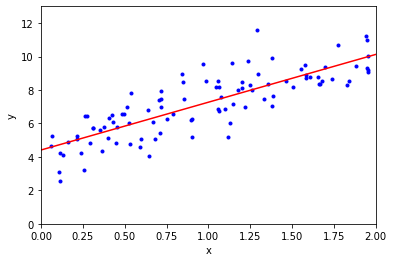

In [29]:
plt.plot(X, y, "b.", X_new, y_predict, "r-")
plt.axis([0, 2, 0, 4+3*2+3])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Using Scikit-Learn

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lin_reg.intercept_, lin_reg.coef_

(array([4.41076926]), array([[2.85790052]]))

In [32]:
lin_reg.predict(X_new)

array([[ 4.41076926],
       [10.12657029]])

**These are the same as the above, so it's using the closed-form solution.**

Which is confirmed when you read the docs.

It doesn't **quite** use the normal equation, instead prefering to use linear algebra techniques and the pseudoinverse for computational performance and stability reasons.

#### Using Stochastic Gradient Descent in SKL

`LinearRegression` always does the closed form. Need to use `SGDRegressor` to use SGD, which fits a linear model and defaults to optimisng MSE as cost function.

In [34]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)  # default learning rate schedule, but with initial value of 0.1
                                                                         # has a regularisation penalty by default, so need to turn it off (to compare to above models)

In [36]:
sgd_reg.fit(X, y.ravel())  # ravel() is equivalent to reshape(-1, order=order), since wants a 1D array for the labels, *not* a column vector

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [37]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.41885365]), array([2.87619766]))

Very close to the closed form values